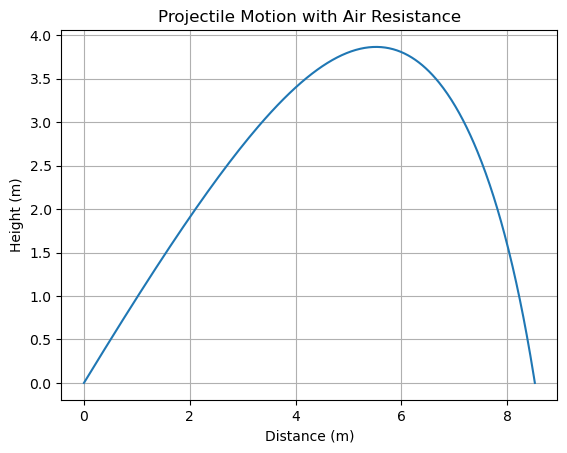

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravity (m/s^2)
b = 0.1  # Air resistance coefficient (this is a sample value)

# Equations of motion with air resistance (quadratic drag)
def motion(t, y, mass):
    x, vx, y, vy = y
    speed = np.sqrt(vx**2 + vy**2)
    ax = -b * speed * vx / mass
    ay = -g - b * speed * vy / mass
    return [vx, ax, vy, ay]

# Event function to stop the simulation when the projectile hits the ground
def hit_ground(t, y):
    return y[2]  # The event is when the y-position (altitude) is 0

# Specify that the event function should terminate the integration
hit_ground.terminal = True
hit_ground.direction = -1

# Solve the motion equations for a given initial velocity and angle
def solve_trajectory(v0, angle, mass):
    angle_rad = np.radians(angle)
    initial_conditions = [0, v0 * np.cos(angle_rad), 0, v0 * np.sin(angle_rad)]
    
    # Time span for the simulation: start at t=0
    t_span = (0, np.inf)  # We let solve_ivp determine the appropriate end time
    
    # Solve the equations of motion
    sol = solve_ivp(lambda t, y: motion(t, y, mass), t_span, initial_conditions,
                    dense_output=True, events=hit_ground, rtol=1e-6)
    
    # Extract the solution
    t = np.linspace(0, sol.t_events[0][0], 300)  # Use the event time as the end point
    x, vx, y, vy = sol.sol(t)
    
    return x, y

# Initial conditions
v0 = 25# Initial velocity (m/s)
angle = 45  # Angle of projection (degrees)
mass = 0.5  # Mass (kg)

# Solve for trajectory
x, y = solve_trajectory(v0, angle, mass)

# Plot the trajectory
plt.figure()
plt.plot(x, y)
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion with Air Resistance')
plt.grid(True)
plt.show()
